In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv("E:/Data Science/Modules/Module 4(ML)/KNN/Data/bigmartsales.csv")

In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**fill null values**

In [6]:
mean = df["Item_Weight"].mean()
print("Item_Weight mean:",mean)
df["Item_Weight"].fillna(mean, inplace=True)

# Item_Weight has a Dtype(float) so that's y we are filled(Item_weight) using mean 
# After that to fill the null value we used "fillna" function

Item_Weight mean: 12.857645184136183


In [7]:
mode = df["Outlet_Size"].mode()
print("Outlet_Size medium:", mode)
df["Outlet_Size"].fillna(mode[0], inplace=True)

# Outlet_Size has a Dtype(Object) so that's y we are filled(Outlet_Size) using mode

Outlet_Size medium: 0    Medium
dtype: object


In [8]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [9]:
df.shape

(8523, 12)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [11]:
df.describe()

# descibe shows only Dtype "float" values.

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


#### Check values count
**it helps to find dublicate categorical names**

In [12]:
df["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [13]:
df.replace("Low Fat", "Low Fat", inplace=True)
df.replace("LF", "Low Fat", inplace=True)
df.replace("low fat", "Low Fat", inplace=True)

In [14]:
df.replace("Regular", "regular", inplace = True)
df.replace("reg", "regular", inplace = True)

In [15]:
df["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [16]:
df["Outlet_Identifier"].value_counts()

OUT027    935
OUT013    932
OUT035    930
OUT046    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [17]:
df["Outlet_Size"].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [18]:
df["Outlet_Location_Type"].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [19]:
df["Outlet_Type"].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [20]:
df.replace("Supermarket Type1", "Supermarket", inplace=True)
df.replace("Supermarket Type2", "Supermarket", inplace=True)
df.replace("Supermarket Type3", "Supermarket", inplace=True)

In [21]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket,3735.1380
1,DRC01,5.92,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket,2097.2700
3,FDX07,19.20,regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket,994.7052


In [22]:
df.drop(["Item_Identifier", "Outlet_Identifier"], axis=1, inplace = True )

In [23]:
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket,3735.1380
1,5.920,regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket,2097.2700
3,19.200,regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket,2778.3834
8519,8.380,regular,0.046982,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket,1193.1136
8521,7.210,regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket,1845.5976


In [24]:
df = pd.get_dummies(df) 
# get_dummies convert categorical data into numerical (and it shows the contain which is in data frame) 
# get_dummies created new columns.
# example { df["Item_Fat_Content"].value_counts(),
# Low Fat 5089, Regular 2889, LF 316, reg 117, low fat 112 }
# if this perticular category present in "Item_fat_content" then we are getting value 1 if not then 0 

In [25]:
df

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket
0,9.300,0.016047,249.8092,1999,3735.1380,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1,5.920,0.019278,48.2692,2009,443.4228,0,1,0,0,0,...,1,0,0,1,0,0,0,1,0,1
2,17.500,0.016760,141.6180,1999,2097.2700,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
3,19.200,0.000000,182.0950,1998,732.3800,0,1,0,0,0,...,0,0,0,1,0,0,0,1,1,0
4,8.930,0.000000,53.8614,1987,994.7052,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
8519,8.380,0.046982,108.1570,2002,549.2850,0,1,1,0,0,...,0,0,0,1,0,0,1,0,0,1
8520,10.600,0.035186,85.1224,2004,1193.1136,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
8521,7.210,0.145221,103.1332,2009,1845.5976,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      8523 non-null   float64
 1   Item_Visibility                  8523 non-null   float64
 2   Item_MRP                         8523 non-null   float64
 3   Outlet_Establishment_Year        8523 non-null   int64  
 4   Item_Outlet_Sales                8523 non-null   float64
 5   Item_Fat_Content_Low Fat         8523 non-null   uint8  
 6   Item_Fat_Content_regular         8523 non-null   uint8  
 7   Item_Type_Baking Goods           8523 non-null   uint8  
 8   Item_Type_Breads                 8523 non-null   uint8  
 9   Item_Type_Breakfast              8523 non-null   uint8  
 10  Item_Type_Canned                 8523 non-null   uint8  
 11  Item_Type_Dairy                  8523 non-null   uint8  
 12  Item_Type_Frozen Foo

In [27]:
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket
0,9.30,0.016047,249.8092,1999,3735.1380,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1,5.92,0.019278,48.2692,2009,443.4228,0,1,0,0,0,...,1,0,0,1,0,0,0,1,0,1
2,17.50,0.016760,141.6180,1999,2097.2700,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
3,19.20,0.000000,182.0950,1998,732.3800,0,1,0,0,0,...,0,0,0,1,0,0,0,1,1,0
4,8.93,0.000000,53.8614,1987,994.7052,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1


In [28]:
df.shape

(8523, 31)

**Train test split**

In [29]:
train, test = train_test_split(df, test_size = 0.3) # it divides whole data sets in 2 parts (training & testing)
# Why we are dividing train & test???
# because we are not sure about value of "K"??
# we used the training data to find the value of K. and that k value we will used for our K data.

# train = we want input(x_train) & output(y_train). **Algorithum training will be on this particular data.
# test = input(x_test) & outout(y_test)(real output values)
# y_hat is "predicted value" which is come from trained algorithum we used for training after give it input(x_test).

In [30]:
train.shape

(5966, 31)

In [31]:
test.shape

(2557, 31)

**Features & targets**

In [32]:
#feature 
x_train = train.drop("Item_Outlet_Sales", axis=1)
#target 
y_train = train["Item_Outlet_Sales"]  # x_trian & y_train shape values should be similar. 

In [33]:
x_train.shape

(5966, 30)

In [34]:
y_train.shape  # which has got only 1 column.

(5966,)

In [35]:
x_test = test.drop("Item_Outlet_Sales", axis=1)
y_test = test["Item_Outlet_Sales"]

In [36]:
x_test.shape

(2557, 30)

In [37]:
y_test.shape

(2557,)

In [38]:
print("Training feature set size:", x_train.shape)
print("Test feature set size:",x_test.shape)
print("Training variable set size:", y_train.shape)
print("Test variable set size:", y_test.shape)

Training feature set size: (5966, 30)
Test feature set size: (2557, 30)
Training variable set size: (5966,)
Test variable set size: (2557,)


### Feature Scaling
**Standarisation Method MinMaxScaler**

X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0)) X_scaled = X_std * (max - min) + min

where min, max = feature_range.

In [39]:
scaler = MinMaxScaler(feature_range=(0,1))

x_train_scaled = scaler.fit_transform(x_train)  # fit_transform normalised the data.
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [40]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.401608,0.022259,0.700143,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.949390,0.364955,0.331792,1.000000,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.672522,0.062388,0.053995,0.500000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,0.120274,0.230399,0.484530,0.708333,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.508782,0.228204,0.185678,0.500000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5961,0.125930,0.275021,0.421364,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
5962,0.562370,0.088389,0.424625,0.916667,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
5963,0.979160,0.150375,0.686583,0.583333,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
5964,0.452218,0.129579,0.391406,0.916667,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [41]:
x_test

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.494352,0.195688,0.422717,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.494352,0.000000,0.188798,0.000000,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.711224,0.262219,0.297127,0.083333,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.202739,0.093759,0.553952,1.000000,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.901756,0.256911,0.622672,0.583333,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2552,0.931527,0.328874,0.663555,0.791667,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2553,0.657636,0.266792,0.343521,0.083333,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2554,0.532599,0.058749,0.212007,0.083333,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2555,0.494352,0.000000,0.258379,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


### Model fit and training

In [42]:
rmse_val = []

for K in range(20):
    K=K+1
    
    model = KNeighborsRegressor(n_neighbors = K)
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test) # (x_test) because we are going to use this input in trained algorithum(KNeighborsRegressor(n_neighbors = K).
    
    error = np.sqrt(metrics.mean_squared_error(y_test, y_pred)) #(y_test) used here because it's "real output" and "y_pred" is our "predicted output"
    
    rmse_val.append(error)
    
    print("RMSE value for K:", K, "is", error)

RMSE value for K: 1 is 1557.8136894491818
RMSE value for K: 2 is 1394.030068958224
RMSE value for K: 3 is 1296.359991331728
RMSE value for K: 4 is 1264.2401337929211
RMSE value for K: 5 is 1236.0428966039879
RMSE value for K: 6 is 1211.4243919180024
RMSE value for K: 7 is 1209.346810637691
RMSE value for K: 8 is 1213.3212292062792
RMSE value for K: 9 is 1203.9875413235416
RMSE value for K: 10 is 1204.6890345662446
RMSE value for K: 11 is 1203.8916682566494
RMSE value for K: 12 is 1205.0811836485066
RMSE value for K: 13 is 1210.8055832106495
RMSE value for K: 14 is 1217.5340171943594
RMSE value for K: 15 is 1222.2883291444605
RMSE value for K: 16 is 1227.2718136943229
RMSE value for K: 17 is 1233.596034361505
RMSE value for K: 18 is 1236.1482444514706
RMSE value for K: 19 is 1243.5771025207075
RMSE value for K: 20 is 1250.3249309242792


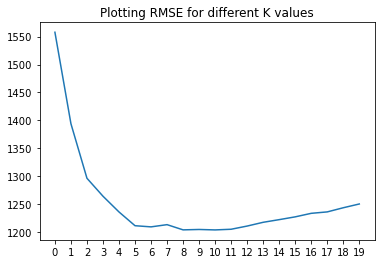

In [43]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val)
ax = curve.plot(kind = 'line', title = "Plotting RMSE for different K values", legend = False )
ax.set_xticks(range(0,20,1))

In [44]:
final_model = KNeighborsRegressor(n_neighbors = 8)
final_model.fit(x_train, y_train)

y_pred = final_model.predict(x_test)
y_pred

array([3837.83765 , 2699.236425, 1258.0291  , ..., 1136.104475,
        331.5684  ,  499.18355 ])

In [45]:
data = {"y_actual": y_test,
       "y_predicted": y_pred}

df_check = pd.DataFrame(data, columns = ["y_actual", "y_predicted"])
df_check.head()

,y_actual,y_predicted
5299,4828.3816,3837.837650
8327,3012.0792,2699.236425
2367,1948.1308,1258.029100
5174,2750.4198,2523.631675
5034,3954.8520,1712.520825


### Evaluation

In [46]:
print("R-squared value of this fit:", round(metrics.r2_score(y_test,y_pred),3))

R-squared value of this fit: 0.472


In [47]:
print("Mean absolute error", metrics.mean_absolute_error(y_test,y_pred))
print("Mean square error", metrics.mean_squared_error(y_test,y_pred))
print("Root mean square error",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean absolute error 865.3120019065309
Mean square error 1472148.4052426363
Root mean square error 1213.3212292062792
